# Rapport - Labb 3

## Intro

Denna rapport undersöker hur datan i dokumentet unlabelled_data.csv kan fördelas i python med hjälp av en rät linje. Den undersöker också skillnaden mellan olika linjer och deras effektivitet på att dela in datan jämt.

## Metod

Mitt mål i den här rapporten var att klassificera datapunkter via linjär klassificering. Jag valde att använda pandas och matplotlib som hjäpmedel i processen, både för datahanteringen och för visualiseringen. Den generella planen för kodstruktuen var att först läsa in all data och spara den i en pandas dataFrame där man snare lägger till klassifiering i nya kolumner baserat på resultaten av en klassifieringsfunktion.

## Utförande

Jag började med att importera alla bibliotek som behövs. I det här steget skapade jag också en variabel för var datorn ska hitta datan för att programmet lättare att användas av andra.

In [101]:
import numpy as np #this project uses the exercises_env
import pandas as pd
import matplotlib.pyplot as plt
filePath = r"C:\Users\herrt\Desktop\Git Repos\python-programming-Theodor-Helje\Labs\Labb 3"

Efter det definierade jag funktionen "classifyPoint" som är till för att ta in k- och m-värden (från y = kx + m) tillsammans med x- och y-kordinater och sedan returnera 1 eller 0 beroende på om punkten befinner sig under eller över linjen.

In [102]:

def classifyPoint(k, m, xPoint, yPoint):
    yLine = k * xPoint + m
    if yPoint < yLine:
        classification = 0
    else:
        classification = 1
    return(classification)

I nästa del av databehandlingen och klassifieringen definiers en pandas dataFrame genom att läsa in all data ur csv-dokumentet med alla punkter. Efter det klassifieras alla punkter baserat på deras relativa position till de olika linjerna som ska jämföras. Lambdafunktioner användes för att smidigt iterera över raderna. Jag valde att kalla min ursprungliga linje för y(x).

In [103]:

dataPoints = pd.read_csv(rf"{filePath}\unlabelled_data.csv", header = None)
dataPoints['yx'] = dataPoints.apply(lambda row : classifyPoint(-1, 0, row[0], row[1]), axis = 1)
dataPoints['fx'] = dataPoints.apply(lambda row : classifyPoint(-0.489, 0, row[0], row[1]), axis = 1)
dataPoints['gx'] = dataPoints.apply(lambda row : classifyPoint(-2, 0.16, row[0], row[1]), axis = 1)
dataPoints['hx'] = dataPoints.apply(lambda row : classifyPoint(800, -120, row[0], row[1]), axis = 1)

Vid det här laget finns all data och alla klassifieringar i dataFramen dataPoints och det sista steget är att räkna ut och spara fördelningen de olika linjerna skapar så att deras effektivitet kan jämföras med varandras.

In [104]:
yx = abs(float(sum(dataPoints['yx']) / dataPoints['yx'].count()) * 100 - 50) * 2
fx = abs(float(sum(dataPoints['fx']) / dataPoints['hx'].count()) * 100 - 50) * 2
gx = abs(float(sum(dataPoints['gx']) / dataPoints['hx'].count()) * 100 - 50) * 2
hx = abs(float(sum(dataPoints['hx']) / dataPoints['hx'].count()) * 100 - 50) * 2

Jag valde att multiplicera alla värden med 100, ta bort 50 och sedan multiplicera med 2 för att få mängden av punkter i procent som är felklassifierade (förutsatt att rätt klassifiering är den som get ett 50/50 förhållande). Detta ger ett lätt sätt att jämföra alla linjernas effektivitet.

## Resultat

(matplotlib används för att rita datan)

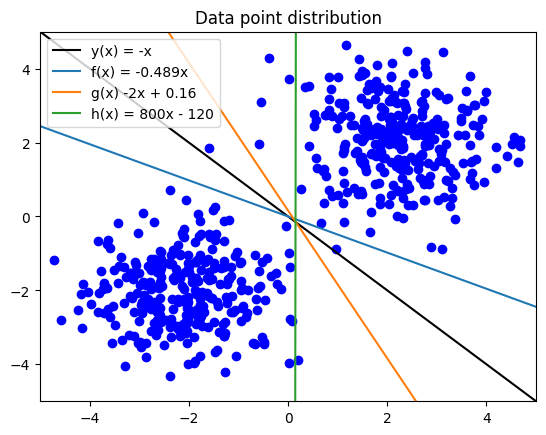

In [105]:
x = np.linspace(-5, 5)
plt.title("Data point distribution")
plt.scatter(dataPoints[0], dataPoints[1], color = 'blue')
plt.plot(x, -x, color = 'black', label = "y(x) = -x")
plt.plot(x, 0.489 * -x, label = "f(x) = -0.489x")
plt.plot(x, 2 * -x + 0.16, label = "g(x) -2x + 0.16")
plt.plot(x, 800 * x - 120, label = "h(x) = 800x - 120")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()

Grafen ovan visar både alla datapunkter och alla sträck.

Text(0.5, 0, 'funktioner')

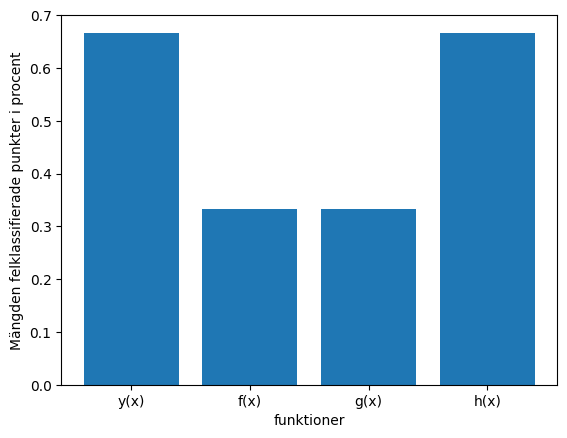

In [106]:
plt.bar(["y(x)", "f(x)", "g(x)", "h(x)"], [yx, fx, gx, hx])
plt.ylabel("Mängden felklassifierade punkter i procent")
plt.xlabel("funktioner")

Grafen ovan visar tydligt att funktionerna f(x) och g(x) delar datan jämnare (på grund av att deras felmarginal bara är runt 0.33%). Det innebär att både f(x) och g(x) är att föredra över y(x) och h(x)